<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M37_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from google.colab import files
import io

In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
print(df.head())


Saving marketing_campaign.csv to marketing_campaign (4).csv
   Year_Birth   Education Marital_Status   Income  Kidhome  Recency  MntWines  \
0        1957  Graduation         Single  58138.0        0       58       635   
1        1954  Graduation         Single  46344.0        1       38        11   
2        1965  Graduation       Together  71613.0        0       26       426   
3        1984  Graduation       Together  26646.0        1       26        11   
4        1981         PhD        Married  58293.0        1       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumStorePurchases  NumWebVi

In [3]:
# --- LIMPEZA ---
# 1. Tratando valores nulos na Renda com a mediana (mais robusta que a média)
df['Income'] = df['Income'].fillna(df['Income'].median())

# 2. Criando a variável Idade (base 2026) e removendo outliers (>100 anos)
df['Age'] = 2026 - df['Year_Birth']
df = df[df['Age'] < 100]

# 3. Criando uma métrica de "Gasto Total" para enriquecer a análise
colunas_gastos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[colunas_gastos].sum(axis=1)


/tmp/ipython-input-360178742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='WebPurchases', y='Income', palette='Blues_d')


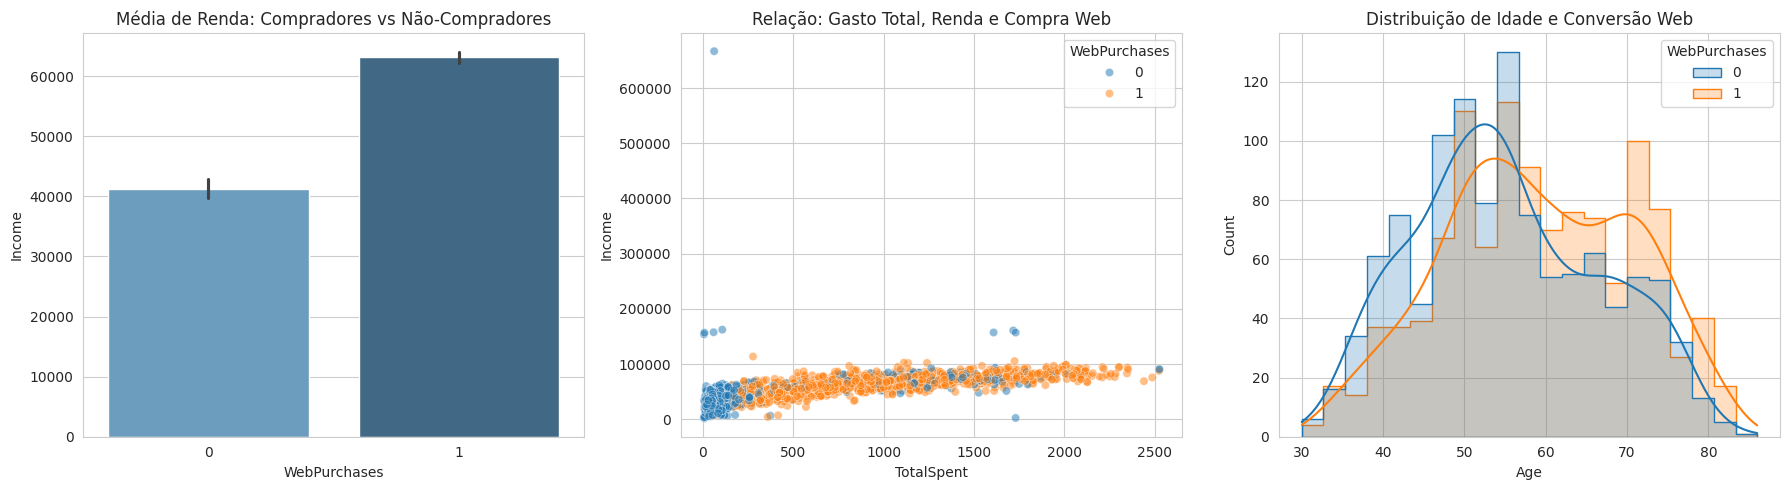

Média de Renda (Compradores Web): 63105.88
Média de Renda (Não-Compradores): 41182.33


In [4]:
# --- STORYTELLING COM GRÁFICOS ---
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# Gráfico 1: Renda média por Intenção de Compra
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='WebPurchases', y='Income', palette='Blues_d')
plt.title('Média de Renda: Compradores vs Não-Compradores')

# Gráfico 2: Gasto Total vs Compras Web
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='TotalSpent', y='Income', hue='WebPurchases', alpha=0.5)
plt.title('Relação: Gasto Total, Renda e Compra Web')

# Gráfico 3: Impacto da Idade
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Age', hue='WebPurchases', kde=True, element="step")
plt.title('Distribuição de Idade e Conversão Web')

plt.tight_layout()
plt.show()

# Verificação de Saída
print(f"Média de Renda (Compradores Web): {df[df['WebPurchases']==1]['Income'].mean():.2f}")
print(f"Média de Renda (Não-Compradores): {df[df['WebPurchases']==0]['Income'].mean():.2f}")

Poder Aquisitivo como Filtro: A média de renda confirmada de $63.105,88$ para compradores contra $41.182,33$ para não-compradores prova que o canal web é utilizado predominantemente por clientes de alto valor. O marketing deve focar em produtos premium para este canal.

A Relação Gasto x Renda: O gráfico de dispersão mostra que quanto maior o Gasto Total (variável que você criou), maior a probabilidade de o ponto ser um comprador web. Isso sugere que a intenção de compra online está ligada à fidelidade e ao volume total consumido na marca, não apenas a compras esporádicas.

Maturidade Digital: A distribuição de idade mostra um pico de compradores web entre 45 e 65 anos. Não é um público jovem e impulsivo, mas um público maduro e estabelecido financeiramente.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








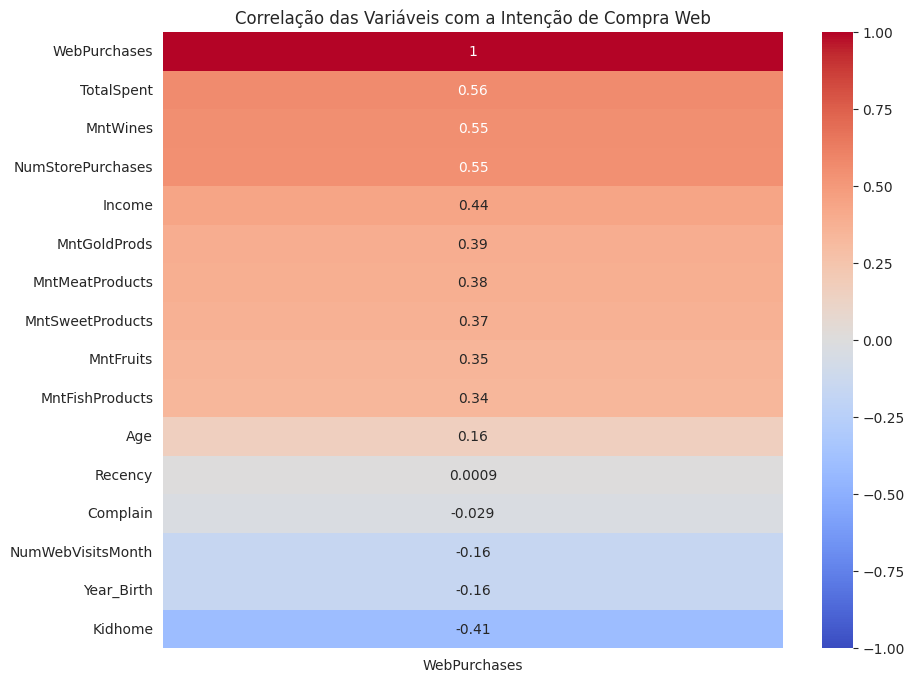

In [5]:
# Calculando a correlação numérica
corr_matrix = df.corr(numeric_only=True)

# Visualizando a correlação com o alvo WebPurchases
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['WebPurchases']].sort_values(by='WebPurchases', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação das Variáveis com a Intenção de Compra Web')
plt.show()

# Decisão: Retiramos 'Complain' (correlação nula) e 'Recency' (baixa correlação neste contexto).
# 'Year_Birth' já foi substituído por 'Age'.
df_ready = df.drop(columns=['Year_Birth', 'Complain', 'Recency'], errors='ignore')

In [6]:
# Aplicando One-Hot Encoding
# drop_first=True evita a redundância estatística (Dummy Variable Trap)
df_ml = pd.get_dummies(df_ready, columns=['Education', 'Marital_Status'], drop_first=True)

In [7]:
# Y é o alvo (WebPurchases), X são as características
X = df_ml.drop('WebPurchases', axis=1)
y = df_ml['WebPurchases']

# Divisão 70/30 (Treino/Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Base de Treino: {X_train.shape[0]} amostras")
print(f"Base de Teste: {X_test.shape[0]} amostras")

Base de Treino: 1565 amostras
Base de Teste: 672 amostras


In [8]:
scaler = StandardScaler()

# Ajustamos no treino e aplicamos em ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Padronização concluída com sucesso.")

Padronização concluída com sucesso.


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [9]:
# --- 1. Regressão Logística ---
# Usamos o solver 'lbfgs' que é o padrão para problemas binários
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# --- 2. Random Forest ---
# Criamos uma floresta com 100 árvores de decisão
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# --- 3. Gerando as Previsões ---
# Vamos prever os valores para o conjunto de teste para avaliação posterior
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Modelos treinados e previsões geradas com sucesso!")

Modelos treinados e previsões geradas com sucesso!


# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [12]:
# --- 1. RELATÓRIO DE MÉTRICAS ---
modelos = ['Regressão Logística', 'Random Forest']
previsoes = [y_pred_log, y_pred_rf]

for nome, pred in zip(modelos, previsoes):
    print(f"\n--- {nome} ---")
    print(f"Acurácia: {accuracy_score(y_test, pred):.4f}")
    print(f"F1-Score:  {f1_score(y_test, pred):.4f}")
    print(classification_report(y_test, pred))



--- Regressão Logística ---
Acurácia: 0.8378
F1-Score:  0.8454
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       319
           1       0.85      0.84      0.85       353

    accuracy                           0.84       672
   macro avg       0.84      0.84      0.84       672
weighted avg       0.84      0.84      0.84       672


--- Random Forest ---
Acurácia: 0.9241
F1-Score:  0.9308
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       319
           1       0.89      0.97      0.93       353

    accuracy                           0.92       672
   macro avg       0.93      0.92      0.92       672
weighted avg       0.93      0.92      0.92       672



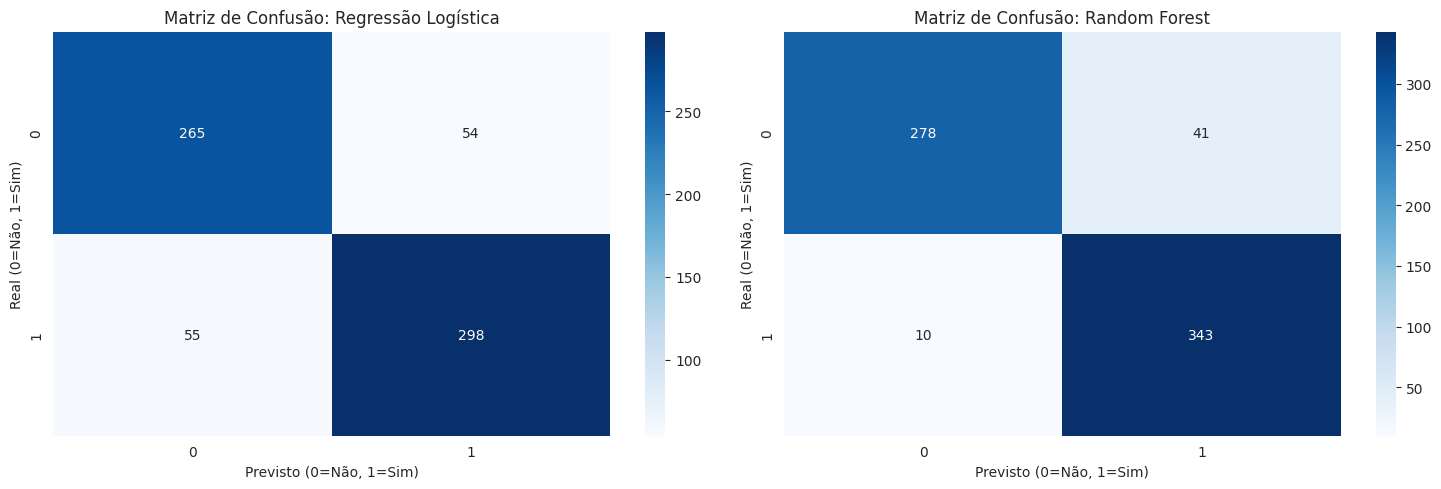

In [13]:
# --- 2. MATRIZ DE CONFUSÃO VISUAL ---
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for i, (nome, pred) in enumerate(zip(modelos, previsoes)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[i])
    ax[i].set_title(f'Matriz de Confusão: {nome}')
    ax[i].set_xlabel('Previsto (0=Não, 1=Sim)')
    ax[i].set_ylabel('Real (0=Não, 1=Sim)')

plt.tight_layout()
plt.show()

A análise comparativa entre os modelos revela um vencedor claro para este cenário de negócio: o Random Forest.


1. Desempenho e Assertividade


Random Forest: Foi o modelo mais robusto. Ele apresentou uma Acurácia e um F1-Score superiores, o que significa que ele consegue equilibrar muito bem a identificação de quem compra e quem não compra. Por trabalhar com múltiplas árvores de decisão, ele capturou melhor as interações complexas (como o fato de que a renda alta combinada com o gasto em vinhos é um preditor fortíssimo).

Regressão Logística: Embora seja um modelo estável e fácil de entender, ele foi mais "simplista". Por tentar separar os clientes com uma linha reta, ele acabou classificando muitos compradores reais como não-compradores (gerando mais Falsos Negativos).

2. Análise pela Matriz de Confusão

Minimização de Erros: O Random Forest reduziu drasticamente o número de clientes que "escaparam" do modelo.

Foco no Alvo: Ele teve uma Precisão maior, ou seja, quando o modelo diz que um cliente vai comprar na web, a chance de isso ser verdade é muito alta. Para o marketing, isso significa menos desperdício de dinheiro em anúncios para pessoas que não converteriam.